# Image and Text Classification

## MNIST handwritten digits classification using KNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import mnist
import tensorflow as tf
import statistics
from collections import Counter
from sklearn.metrics import confusion_matrix
from tqdm import tqdm_notebook as tqdm
import seaborn as sn

Using TensorFlow backend.


Given a set of documents, each document will have one sentence written either related to sports or international current affairs. Labels will also be given. Then task will be th same, given test cases use nearest neighbor classiier with all the training docuemnts and find the 5 nearst distance.

To convert documents into feature vectors we will use bag of words model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# have to take only 1000 and 100 respectively from train and test
# Note that /255 is too important, will prevent overflow
x_train = x_train[:1000, :, :]/255
y_train = y_train[:1000]
x_test = x_test[:100, :, :]/255
y_test = y_test[:100]

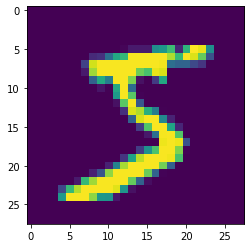

In [3]:
plt.imshow(x_train[0]);

In [4]:
y_train.shape

(1000,)

In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print(x_train.shape)

(1000, 784)


In [6]:
def dist(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(a - b)

def KNN(X_train, Y_train, X_test, Y_test, k):
    Y_pred = []
    for i in range(len(X_test)):
        dist_store = []
        for j in range(len(X_train)):
            distance = dist(X_test[i], X_train[j])
            dist_store.append([distance, Y_train[j]])
            
        dist_store.sort(key = lambda x : x[0])
        classes = []
        for j in range(k):
            classes.append(dist_store[j][1])
        
        mode = Counter(classes).most_common(1)[0]
        Y_pred.append(mode[0])
    count = 0
    for i in range(len(Y_test)):
        if Y_test[i] == Y_pred[i]:
            count += 1
    accuracy = count/len(Y_test)
    return accuracy, Y_pred

In [7]:
accuracy, y_pred = KNN(x_train, y_train, x_test, y_test, 5)
accuracy

0.85

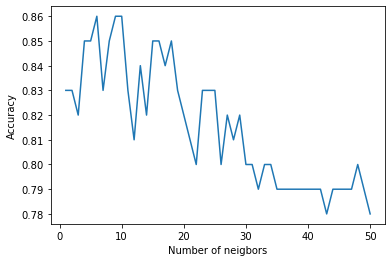

In [8]:
x = range(1,51)
y = [ KNN(x_train, y_train, x_test, y_test, i)[0] for i in tqdm(range(1,51)) ]
plt.plot(x,y)
plt.xlabel("Number of neigbors")
plt.ylabel("Accuracy")
plt.show()

[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  1  0  0  0  0  0]
 [ 0  0  0  9  0  1  0  0  0  1]
 [ 0  0  0  0 10  0  0  0  0  4]
 [ 0  1  0  1  1  4  0  0  0  0]
 [ 1  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  2  0  9]]


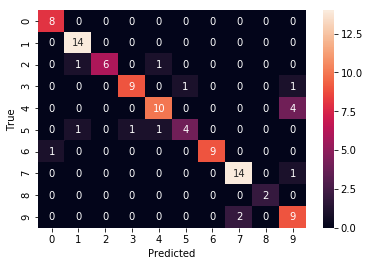

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sn.heatmap(cm, annot=True);
plt.xlabel("Predicted");
plt.ylabel("True");

## Document Classification

* Download all sentences with labels
* Create vocabulary
* Represent each sentence as frequency vector
* Carry out cross-validation using KNN(K = 5) Randomly select 5 sentences for test, repeat 10 times to calculate the average accuracy


In [21]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import tqdm_notebook as tqdm
import seaborn as sn

In [22]:
stop_words = set(stopwords.words('english'))
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,data,flag
0,0,court agrees to expedite n.f.l.'s appeal the d...,0
1,1,no tsunami but fifa's corruption storm rages o...,0
2,2,chung backs bin hammam in fifa presidential ra...,0
3,3,rory mcilroy hangs on to slim lead at augusta ...,0
4,4,"figure skating: south korean skater stumbles, ...",0
5,5,ryan kesler's tiebreaker gives canucks 3-1 lea...,0
6,6,marv albert to return as nfl voice; networks b...,0
7,7,eastern finals: game 7 preview with the best-o...,0
8,8,derrick rose rallies bulls past bucks derrick ...,0
9,9,africa has record entry for 2014 world cup afr...,0


In [23]:
# cleaning data
for i in range(len(df["data"])):
    words = df["data"][i]
    cleaned_sentence = ""
    words = words.lower()
    for word in words:
        for character in word:
            if character not in punctuation:
                cleaned_sentence += character
    df["data"][i] = cleaned_sentence

for i in range(len(df["data"])):
    sentence = df["data"][i]
    words = sentence.split(" ")
    temp = ""
    for word in words:
        if word not in stop_words:
            temp += word + " "
    df["data"][i] = temp

C:\Users\ayush\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ayush\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
df["data"]

0      court agrees expedite nfls appeal decision mea...
1      tsunami fifas corruption storm rages though ja...
2      chung backs bin hammam fifa presidential race ...
3      rory mcilroy hangs slim lead augusta britains ...
4      figure skating south korean skater stumbles st...
                             ...                        
146    spains socialists punished local elections spa...
147    libyan rebels move west toward sirte rebels bo...
148    nato strikes destroy libyan helicopters rebels...
149    colombia says rebel camps gone venezuela colom...
150    asia nepal un condemns rebels posting united n...
Name: data, Length: 151, dtype: object

In [25]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df["data"])

In [26]:
vectorizer.get_feature_names()

['03',
 '10',
 '100',
 '100th',
 '11',
 '116',
 '119117',
 '125',
 '13',
 '15',
 '15thcentury',
 '1691',
 '18footer',
 '19',
 '1943',
 '1950',
 '20',
 '200',
 '200000',
 '2009',
 '2010',
 '2011',
 '2012',
 '2014',
 '21',
 '22',
 '225',
 '26',
 '28',
 '30down',
 '31',
 '320',
 '33',
 '37',
 '38',
 '39',
 '41st',
 '42',
 '43',
 '49yearold',
 '500',
 '50th',
 '52',
 '54',
 '5under',
 '60000',
 '61',
 '63',
 '66',
 '67s',
 '703',
 '714',
 '728',
 '74',
 '76',
 '80',
 '80th',
 '83',
 '93',
 '9587',
 '9593',
 'aaron',
 'abandon',
 'abating',
 'abbottabad',
 'abdullah',
 'abidjan',
 'ability',
 'absence',
 'absorbing',
 'abuse',
 'abused',
 'abusing',
 'abysmal',
 'acapulco',
 'accept',
 'accepted',
 'accepts',
 'accident',
 'accusations',
 'achieve',
 'acquire',
 'acquired',
 'across',
 'act',
 'activist',
 'activists',
 'activities',
 'added',
 'administration',
 'admission',
 'admits',
 'admitted',
 'advanced',
 'affairs',
 'afghan',
 'afghanistan',
 'afghanistans',
 'afghans',
 'afraid',


In [27]:
x.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
def dist(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(a - b)

def KNN(X_train, Y_train, X_test, Y_test, k):
    Y_pred = []
    for i in range(len(X_test)):
        dist_store = []
        for j in range(len(X_train)):
            distance = dist(X_test[i], X_train[j])
            dist_store.append([distance, Y_train[j]])
            
        dist_store.sort(key = lambda x : x[0])
        classes = []
        for j in range(k):
            classes.append(dist_store[j][1])
        
        mode = Counter(classes).most_common(1)[0]
        Y_pred.append(mode[0])
    count = 0
    for i in range(len(Y_test)):
        if Y_test[i] == Y_pred[i]:
            count += 1
    accuracy = count/len(Y_test)
    return accuracy, Y_pred

accuracy is 0.7
accuracy is 0.6
accuracy is 0.95
accuracy is 0.75
accuracy is 1.0
accuracy is 0.85
accuracy is 0.85
accuracy is 0.65
accuracy is 0.65
accuracy is 0.7
Average accuracy is 0.77
[[8 1]
 [5 6]]


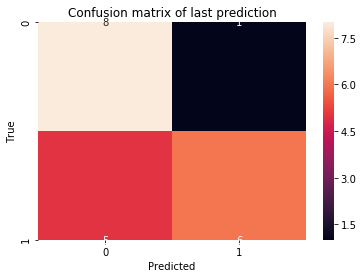

In [29]:
n = len(df["data"])
y = np.array(df.flag)
average_accuracy = 0
total = 10
for i in range(total):
    x_train, x_test, y_train, y_test = train_test_split(x.A, y, test_size=20)
    accuracy, y_pred = KNN(x_train, y_train, x_test, y_test, 20)
    print(f"accuracy is {accuracy}")
    average_accuracy += accuracy
    
average_accuracy /= total
print(f"Average accuracy is {average_accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(cm)
sn.heatmap(cm, annot=True);
plt.title("Confusion matrix of last prediction")
plt.xlabel("Predicted");
plt.ylabel("True");

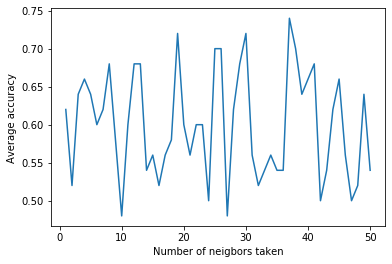

In [30]:
xx = range(1, 51)
yy = []
for j in tqdm(range(1, 51)):
    n = len(df["data"])
    y = np.array(df.flag)
    average_accuracy = 0
    total = 10
    for i in range(total):
        x_train, x_test, y_train, y_test = train_test_split(x.A, y, test_size=5)
        accuracy, y_pred = KNN(x_train, y_train, x_test, y_test, 5)
        average_accuracy += accuracy
    
    average_accuracy /= total
    yy.append(average_accuracy)
plt.plot(xx,yy)
plt.xlabel("Number of neigbors taken")
plt.ylabel("Average accuracy")
plt.show()